In [5]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
data = pd.read_csv('data/house_prices.csv')

# Mostrar las primeras filas del dataset
print(data.head())

# Resumen estadístico de las columnas numéricas
print(data.describe())

# Verificar información de las columnas
print(data.info())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
          longitude      latitude  housing_median_age   total_rooms  \
coun

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


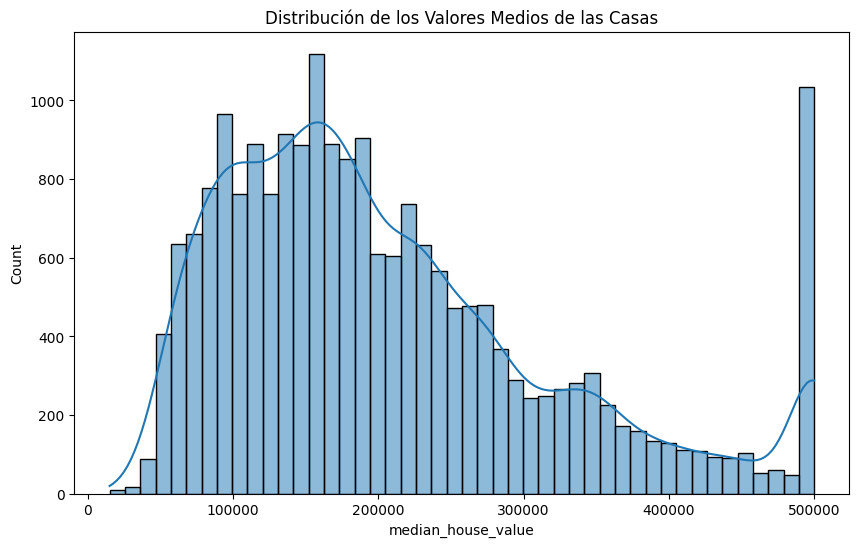

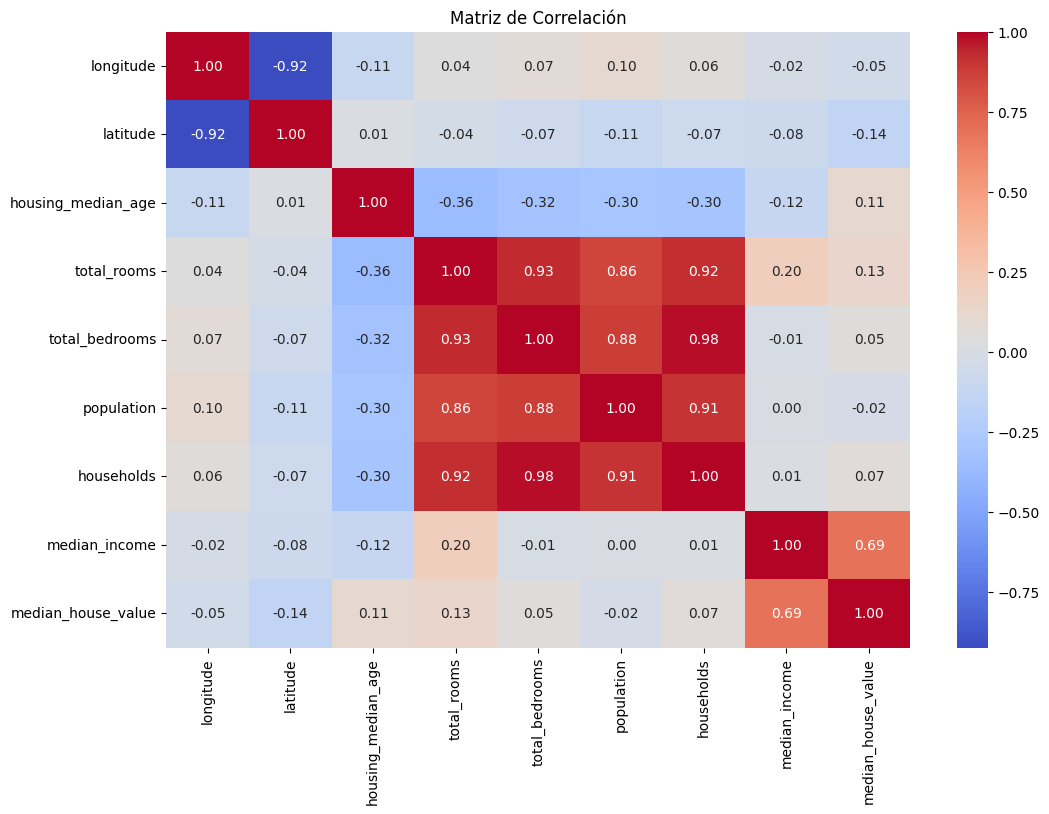

In [11]:
# Comprobar valores nulos
print(data.isnull().sum())

# Visualización de la distribución de la variable objetivo (precio)
plt.figure(figsize=(10, 6))
sns.histplot(data['median_house_value'], kde=True)
plt.title('Distribución de los Valores Medios de las Casas')
plt.show()

# Seleccionar solo columnas numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Correlación entre variables (solo columnas numéricas)
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


In [12]:
# Imputación de valores nulos con la mediana (para variables numéricas)
numeric_columns = numeric_data.columns
for column in numeric_columns:
    data[column].fillna(data[column].median(), inplace=True)


In [13]:
from sklearn.preprocessing import OneHotEncoder

# Aplicar OneHotEncoding a la columna categórica 'ocean_proximity'
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(data[['ocean_proximity']])

# Crear un DataFrame con las nuevas columnas codificadas
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['ocean_proximity']))

# Añadir las columnas codificadas al DataFrame original y eliminar la columna categórica original
data = pd.concat([data, encoded_df], axis=1)
data.drop(['ocean_proximity'], axis=1, inplace=True)


C:\Users\jorge\miniconda3\envs\regresion_ml\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
from sklearn.preprocessing import StandardScaler

# Normalizar todas las columnas numéricas
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_columns])

# Reemplazar las columnas originales con las escaladas
data[numeric_columns] = scaled_data


In [15]:
# Separar las características (X) y la variable objetivo (y)
X = data.drop('median_house_value', axis=1)  # 'median_house_value' es la variable objetivo
y = data['median_house_value']


In [16]:
# Guardar las características y la variable objetivo para el siguiente notebook
X.to_csv('data/processed_X.csv', index=False)
y.to_csv('data/processed_y.csv', index=False)
